In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

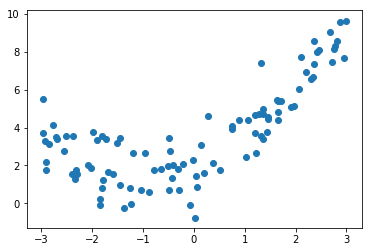

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [5]:
def PolynomialRegression(degree):
    return Pipeline([
            ('ploynomial_features', PolynomialFeatures(degree=degree)),
            ('standard_scaler', StandardScaler()),
            ('linear_regression', LinearRegression())
            ])

In [6]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6779567557015871

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

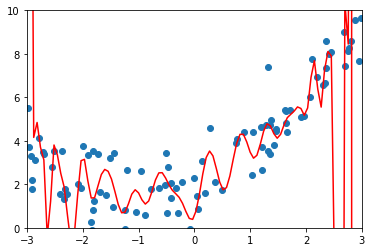

In [9]:
plt.scatter(x, y)
plt.plot(X_plot, y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

## train test split的意义

对训练数据表现较好的模型，未必在测试数据上有好的表现，这就是过拟合的问题，过拟合的泛化能力差
过拟合的理解：
    
    1. 将噪声也拟合进来，受到噪声的干扰
    
    2. 过于专注细节，只见树木，不见深林，把特例当做共性，相当于只会死学的学生，欠拟合相当于不学习或者不用功的学生
    
    3. 过拟合是机器学习中面临的主要问题

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [12]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297902

In [13]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150783

In [14]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

10640444383.797964